In [95]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('Dataset_tomorrow.csv', sep=';')
df.head(10)

df['Date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ '01')
df.set_index('Date')


,year,month,RO,IT,HU,SK,CH,FR,HR,AT,...,BE,NL,DK,PL,DE,LT,UK,LV,EE,IE
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1995,1,0.053080,0.087606,0.055872,0.051406,0.054266,0.062973,0.055455,0.059791,...,0.040884,0.044567,0.029048,0.031334,0.030712,0.024585,0.031776,0.023986,0.019147,0.025426
1995-02-01,1995,2,0.117780,0.113423,0.118002,0.089829,0.080682,0.086628,0.105153,0.088470,...,0.060147,0.058990,0.057697,0.055844,0.052153,0.036201,0.054320,0.030538,0.023547,0.045663
1995-03-01,1995,3,0.127741,0.136424,0.122449,0.112891,0.122136,0.131686,0.104710,0.112093,...,0.118845,0.121030,0.091237,0.089386,0.094870,0.062781,0.100298,0.056142,0.052285,0.076526
1995-04-01,1995,4,0.164368,0.152402,0.162675,0.146225,0.146464,0.138998,0.152577,0.133301,...,0.116167,0.127132,0.144794,0.117651,0.109565,0.127495,0.128779,0.118984,0.114578,0.121020
1995-05-01,1995,5,0.167732,0.165468,0.179006,0.176812,0.163325,0.175834,0.160632,0.167284,...,0.175867,0.181856,0.185204,0.158014,0.146570,0.141416,0.151099,0.143048,0.139806,0.132885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,2015,8,0.186352,0.178862,0.188424,0.182524,0.174613,0.168351,0.175737,0.180034,...,0.164703,0.160863,0.168206,0.181636,0.151069,0.182070,0.115770,0.174662,0.171898,0.113984
2015-09-01,2015,9,0.149607,0.149903,0.151381,0.144664,0.138278,0.151551,0.137926,0.126915,...,0.124688,0.119212,0.121973,0.113753,0.108095,0.098405,0.116899,0.093456,0.086483,0.100463
2015-10-01,2015,10,0.115263,0.101443,0.100023,0.088126,0.109944,0.105449,0.081565,0.096316,...,0.079137,0.081181,0.066722,0.087810,0.069871,0.084820,0.064293,0.080924,0.066157,0.061183


Summary Statistics Questions

> How many countries are there?</br>
> How many years of data?


In [31]:
print("This dataset provides data from {} countries during {} years".format(len(df.columns)-2,df.year.nunique()))

This dataset provides data from 22 countries during 21 years


C:\Users\33660\AppData\Local\Temp/ipykernel_54152/156794682.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.drop(columns=['year','month']).mean().plot.bar();


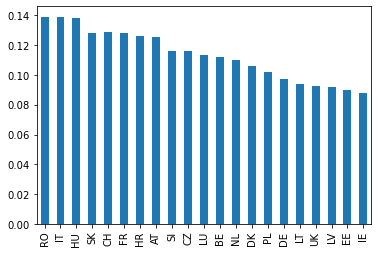

In [128]:
df.drop(columns=['year','month']).mean().plot.bar();

<AxesSubplot:xlabel='year'>

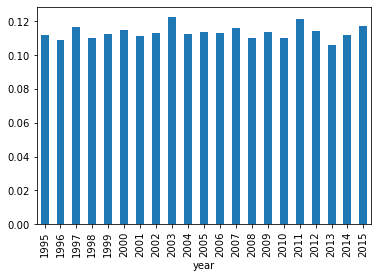

In [129]:
df.drop(columns='month').groupby('year').mean().mean(axis=1).plot.bar()

By month

    Prep steps / play around with data
    Calculate the average efficiency per month in each year across countries

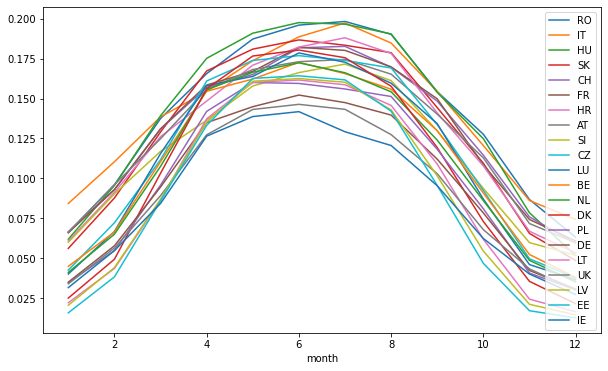

In [144]:
df_month = df.drop(columns='year').groupby('month').mean()
df_month.plot(figsize=(10,6));

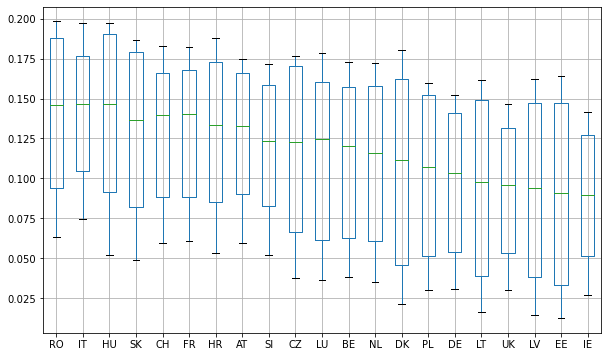

In [85]:
df_month.boxplot(figsize=(10,6));

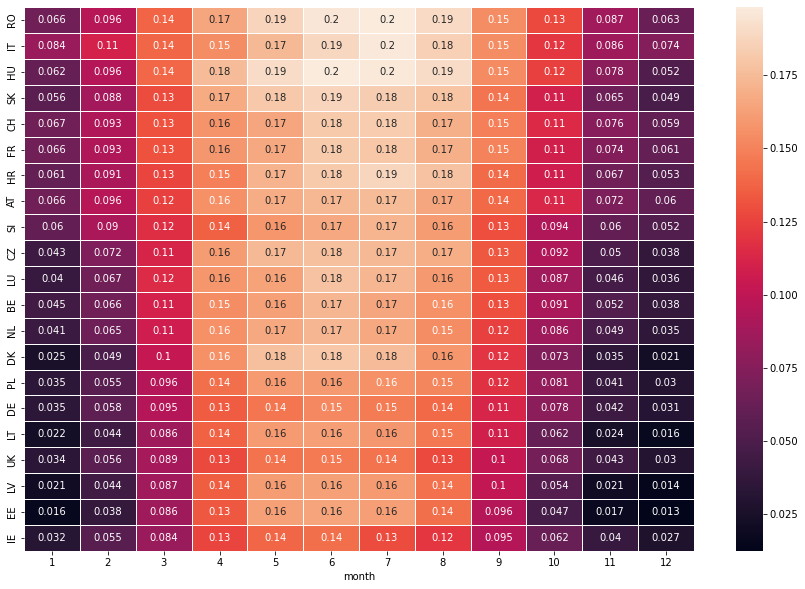

In [105]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_month.T, annot=True, linewidths=.5)

In [145]:
df_analyze = df_month.T

df_analyze['min'] = df_analyze.min(axis=1)
df_analyze['max'] = df_analyze.max(axis=1)
df_analyze['mean'] = df_analyze.mean(axis=1)
df_analyze['min-max']= df_analyze['max']-df_analyze['min']
df_analyze

month,1,2,3,4,5,6,7,8,9,10,11,12,min,max,mean,min-max
RO,0.066067,0.095993,0.137466,0.165599,0.187271,0.196004,0.198277,0.190214,0.154289,0.127627,0.086731,0.063098,0.063098,0.198277,0.137858,0.135179
IT,0.084270,0.110390,0.138475,0.154527,0.173716,0.188649,0.197333,0.184755,0.154429,0.120503,0.086112,0.074271,0.074271,0.197333,0.138502,0.123062
HU,0.061842,0.095505,0.139191,0.175174,0.190932,0.197575,0.196596,0.190467,0.153846,0.124844,0.078413,0.051697,0.051697,0.197575,0.136097,0.145878
SK,0.056110,0.087698,0.129030,0.167275,0.180954,0.186720,0.183391,0.178705,0.144310,0.109433,0.065482,0.048535,0.048535,0.186720,0.126636,0.138185
CH,0.066613,0.092809,0.130861,0.157101,0.165069,0.181777,0.182673,0.169635,0.148345,0.114516,0.075841,0.059421,0.059421,0.182673,0.127625,0.123253
FR,0.065884,0.092995,0.131017,0.158453,0.167027,0.182114,0.180153,0.169820,0.149803,0.108408,0.074225,0.060775,0.060775,0.182114,0.127397,0.121339
HR,0.060834,0.091204,0.126089,0.148406,0.170881,0.182246,0.188048,0.178239,0.140943,0.107772,0.066851,0.053319,0.053319,0.188048,0.125443,0.134729
AT,0.066272,0.096021,0.124830,0.155641,0.168160,0.173078,0.174476,0.165265,0.140201,0.112808,0.071678,0.059654,0.059654,0.174476,0.124444,0.114822
SI,0.059931,0.090271,0.116888,0.136381,0.157841,0.166255,0.171576,0.161208,0.129752,0.093687,0.059727,0.051809,0.051809,0.171576,0.115622,0.119767
CZ,0.042565,0.072157,0.111677,0.160970,0.173855,0.176873,0.173913,0.169141,0.133624,0.092407,0.049590,0.037644,0.037644,0.176873,0.114924,0.139229


<AxesSubplot:>

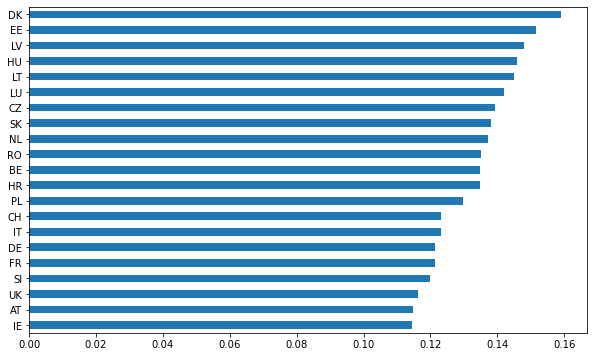

In [65]:
df_analyze['min-max'].sort_values().plot.barh(figsize=(10,6))

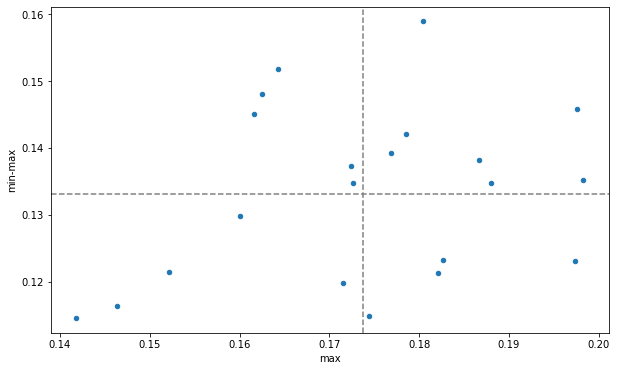

In [81]:
df_analyze.plot.scatter(y = 'min-max', x='max',figsize=(10,6));
plt.axhline(y=df_analyze['min-max'].mean(), color='grey', linestyle='--')
plt.axvline(x = df_analyze['max'].mean(), color='grey', linestyle='--')

In [140]:
print("Which is the maximum value per month and in which country it occurred?")
df_month.reset_index().melt(id_vars='month', value_vars=['RO', 'IT', 'HU', 'SK', 'CH', 'FR', 'HR', 'AT', 'SI', 'CZ', 'LU', 'BE',
       'NL', 'DK', 'PL', 'DE', 'LT', 'UK', 'LV', 'EE', 'IE']).sort_values(by='value').tail(1)

Which is the maximum value per month and in which country it occurred?


,month,variable,value
6,7,RO,0.198277


In [141]:
print("Which is the minimum value per month and in which country it occurred?")
df_month.reset_index().melt(id_vars='month', value_vars=['RO', 'IT', 'HU', 'SK', 'CH', 'FR', 'HR', 'AT', 'SI', 'CZ', 'LU', 'BE',
       'NL', 'DK', 'PL', 'DE', 'LT', 'UK', 'LV', 'EE', 'IE']).sort_values(by='value').head(1)

Which is the minimum value per month and in which country it occurred?


,month,variable,value
239,12,EE,0.012526


In [150]:
print("Calculate the average efficiency for each country")
df_month\
    .reset_index()\
    .melt(id_vars='month', value_vars=['RO', 'IT', 'HU', 'SK', 'CH', 'FR', 'HR', 'AT', 'SI', 'CZ', 'LU', 'BE',
       'NL', 'DK', 'PL', 'DE', 'LT', 'UK', 'LV', 'EE', 'IE'])\
    .drop(columns='month')\
    .groupby('variable').mean()\
    .sort_values(by='value', ascending = False)

Calculate the average efficiency for each country


,value
variable,
RO,0.139053
IT,0.138952
HU,0.138007
CH,0.128722
FR,0.128390
SK,0.128137
HR,0.126236
AT,0.125674
SI,0.116277


In [162]:
print("Calculate the average efficiency for each country per year")
df.drop(columns=['month','Date']).groupby(by = 'year').mean().T

Calculate the average efficiency for each country per year


year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
RO,0.135567,0.129504,0.137918,0.136523,0.138627,0.149264,0.138989,0.137949,0.140936,0.139231,...,0.137413,0.144780,0.140508,0.140354,0.132729,0.146875,0.146503,0.135685,0.133391,0.142257
IT,0.137706,0.129220,0.145973,0.144834,0.138129,0.141430,0.141335,0.134612,0.144918,0.135905,...,0.139851,0.143583,0.136110,0.138374,0.131468,0.148024,0.142830,0.130798,0.133029,0.142599
HU,0.134342,0.129101,0.142781,0.138732,0.133032,0.147775,0.137446,0.136794,0.147288,0.133559,...,0.134333,0.143793,0.139965,0.137701,0.129051,0.147996,0.146115,0.130138,0.132725,0.139993
SK,0.124116,0.121817,0.132600,0.126548,0.124663,0.131371,0.124622,0.126273,0.141284,0.123873,...,0.128314,0.132452,0.125101,0.126710,0.122640,0.139156,0.134377,0.119574,0.125494,0.131138
CH,0.123903,0.122320,0.133746,0.128868,0.121997,0.125312,0.125602,0.124627,0.138501,0.127960,...,0.129492,0.134370,0.125074,0.129453,0.125543,0.143462,0.129681,0.118464,0.126990,0.136684
FR,0.127611,0.125689,0.135472,0.128700,0.126556,0.125575,0.126331,0.125453,0.137335,0.128231,...,0.126415,0.128743,0.123423,0.130938,0.127109,0.134831,0.127909,0.118070,0.129021,0.133621
HR,0.122163,0.115796,0.134135,0.131814,0.123288,0.137125,0.127274,0.121505,0.137202,0.120673,...,0.123369,0.130837,0.125658,0.125278,0.115924,0.137339,0.134280,0.117946,0.115552,0.130649
AT,0.118896,0.118502,0.129536,0.123569,0.122232,0.128023,0.124418,0.124532,0.135771,0.123260,...,0.128184,0.130062,0.123643,0.125086,0.121307,0.138075,0.129888,0.116606,0.121761,0.130335
SI,0.111956,0.104292,0.124133,0.122053,0.111721,0.125020,0.116216,0.113728,0.128906,0.110683,...,0.115667,0.123185,0.111777,0.117166,0.104235,0.130093,0.124645,0.104457,0.104193,0.122289
CZ,0.109916,0.107386,0.120584,0.111316,0.114774,0.117307,0.107479,0.114461,0.130294,0.115752,...,0.121158,0.119890,0.113630,0.114498,0.114115,0.127052,0.122119,0.104279,0.114671,0.121039


In [164]:
print("Which is the maximum value in the entire dataset, where and when it occurred?")
df.reset_index().melt(id_vars=['month','year'], value_vars=['RO', 'IT', 'HU', 'SK', 'CH', 'FR', 'HR', 'AT', 'SI', 'CZ', 'LU', 'BE',
       'NL', 'DK', 'PL', 'DE', 'LT', 'UK', 'LV', 'EE', 'IE']).sort_values(by='value').tail(1)

Which is the maximum value in the entire dataset, where and when it occurred?


,month,year,variable,value
2667,4,2007,LU,0.22906


In [165]:
print("Which is the minimum value in the entire dataset, where and when it occurred?")
df.reset_index().melt(id_vars=['month','year'], value_vars=['RO', 'IT', 'HU', 'SK', 'CH', 'FR', 'HR', 'AT', 'SI', 'CZ', 'LU', 'BE',
       'NL', 'DK', 'PL', 'DE', 'LT', 'UK', 'LV', 'EE', 'IE']).sort_values(by='value').head(1)

Which is the minimum value in the entire dataset, where and when it occurred?


,month,year,variable,value
4859,12,2000,EE,0.009459
